In [1]:
import numpy as np
import os
import dill
script_dir = os.getcwd()


from sde.SDE_ARFF_lib import (
    SDEARFFTrain,
    NNHyperparameters
)

from sde.experiment_reports_owen import (
    PlotResults
)

%load_ext autoreload
%autoreload 2



2025-06-10 09:49:34.079636: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-10 09:49:34.083989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/local/cuda-12.6/lib64::/usr/lib/x86_64-linux-gnu
2025-06-10 09:49:34.084002: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# note book parameters
ex_name = "ex3-1D_cubic"
data_name = f"{ex_name}_time1_SS1e-05_ntraj100"

random_seed = 1
step_size = 0.01


In [3]:
# load true functions
with open(f"true_functions/{ex_name}.pkl", "rb") as f:
    true_functions = dill.load(f)

true_drift = true_functions["drift"]
true_diffusion = true_functions["diffusion"]

# load data
training_data = np.load(f"training_data/{data_name}.npz")

n_dimensions = training_data["n_dimensions"]
trajectory_step_size = training_data["step_size"]
xlim = training_data["xlim"]
trajectories = training_data["trajectories"]

In [16]:
# network parameters
validation_split = .1
ARFF_validation_split = .1

drift_param = NNHyperparameters(K=2**8, 
                                M_min=10,
                                M_max=100,
                                lambda_reg=2e-3,
                                gamma=1,
                                delta=0.1,
                                name='drift')
diff_param = NNHyperparameters(K=drift_param.K,
                               M_min=drift_param.M_min,
                               M_max=drift_param.M_max,
                               lambda_reg=drift_param.lambda_reg,
                               gamma=drift_param.gamma,
                               delta=drift_param.delta,
                               name='diff')


step_size: 0.5
# data points: 200
drift epoch: 35


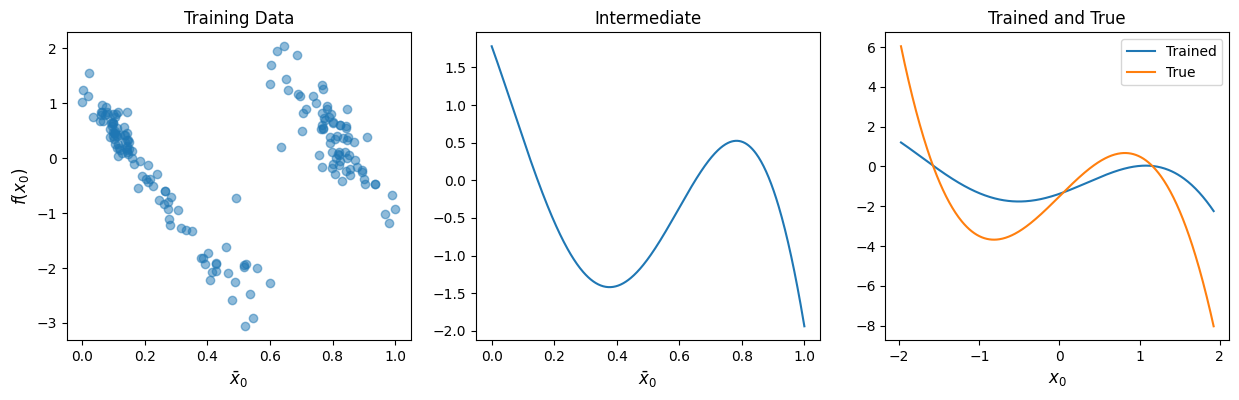

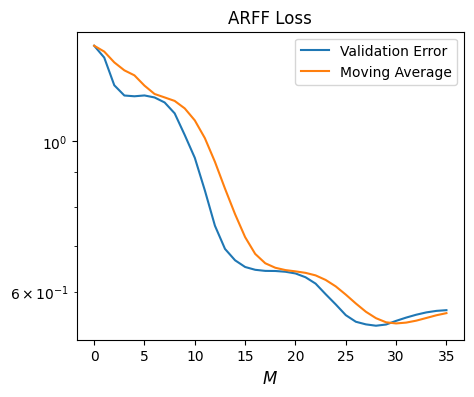

diff epoch: 10
diff completed


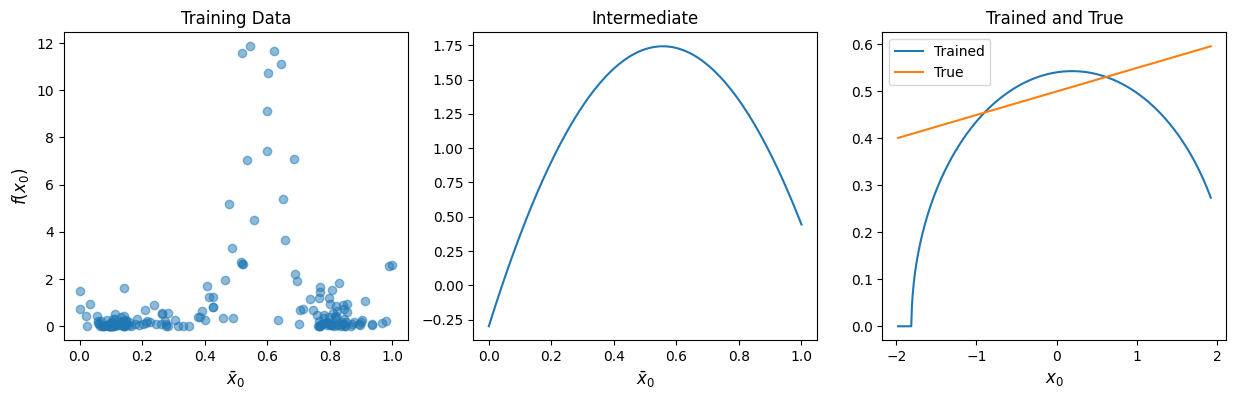

plot completed


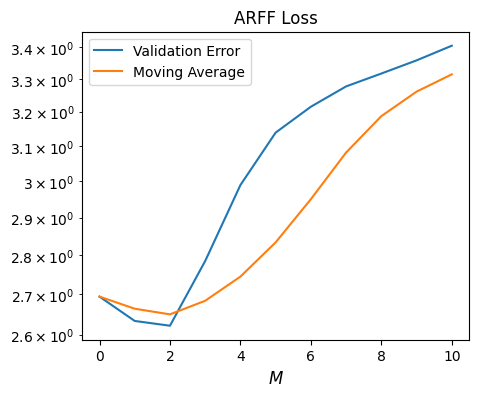

drift_RMSE completed
diff_RMSE completed
loss completed
val_loss completed
true_loss completed
loss completed
Drift RMSE: 1.4827856416015377
Diffusion RMSE: 0.13933449788018015
Observed loss: 16907.10255700269
Observed validation loss: 0.29590801491191276
True loss: 5.618127408946633
Training time: 0.7900142669677734
step_size: 0.1
# data points: 900
drift epoch: 99


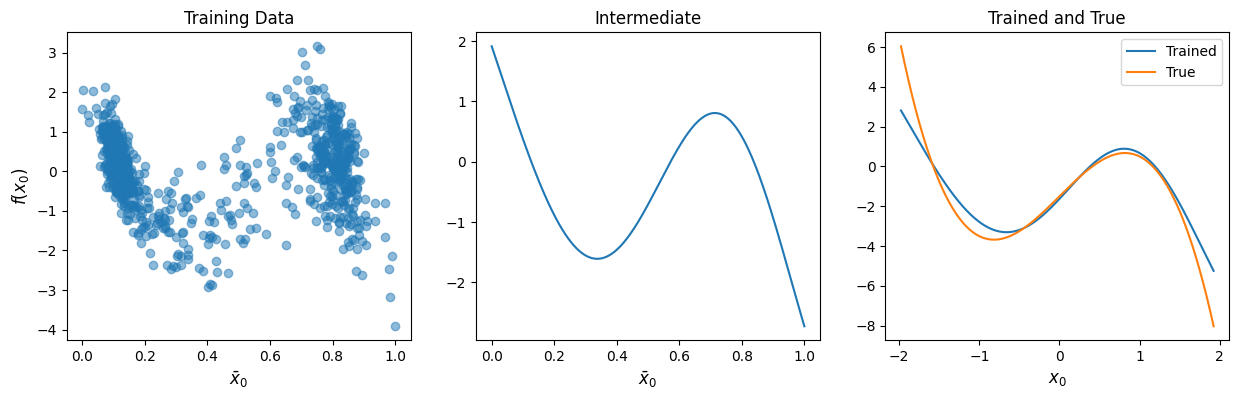

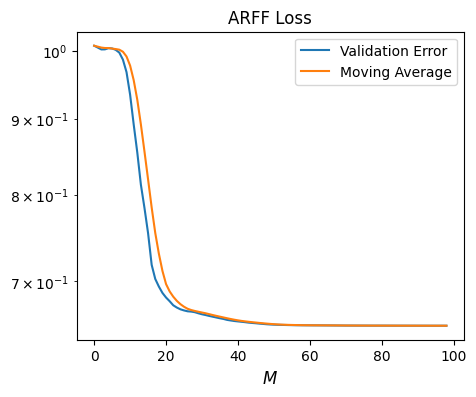

diff epoch: 99
diff completed


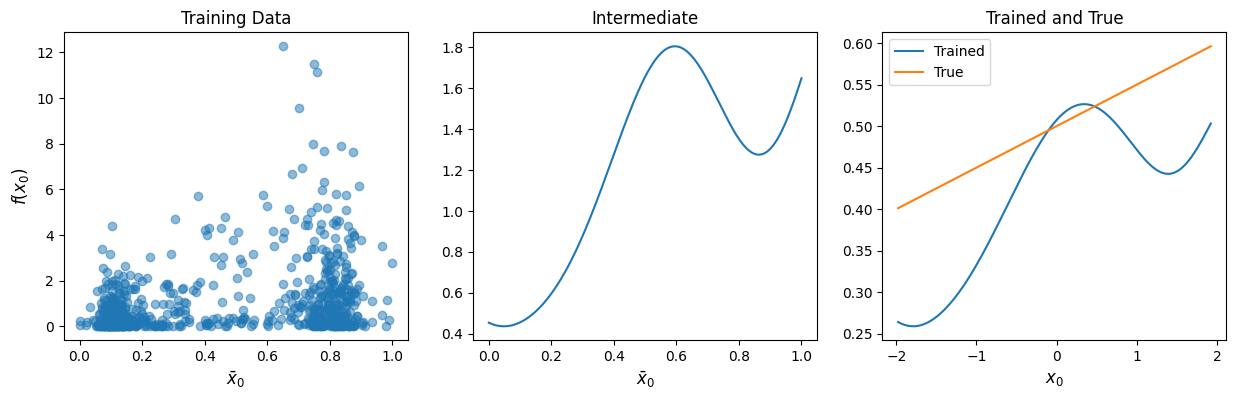

plot completed


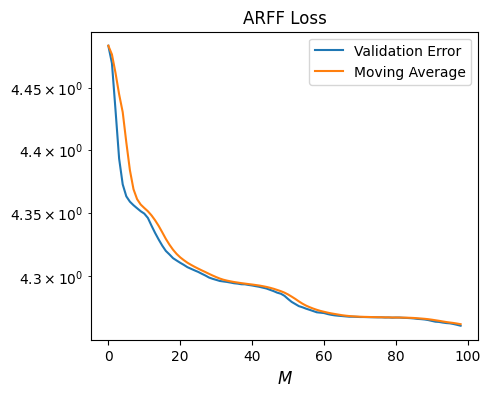

drift_RMSE completed
diff_RMSE completed
loss completed
val_loss completed
true_loss completed
loss completed
Drift RMSE: 0.45998946421346315
Diffusion RMSE: 0.12305711231153312
Observed loss: -0.742595045556694
Observed validation loss: -0.7362760531826038
True loss: -0.5260865664330542
Training time: 10.36510944366455
step_size: 0.05
# data points: 1900
drift epoch: 38


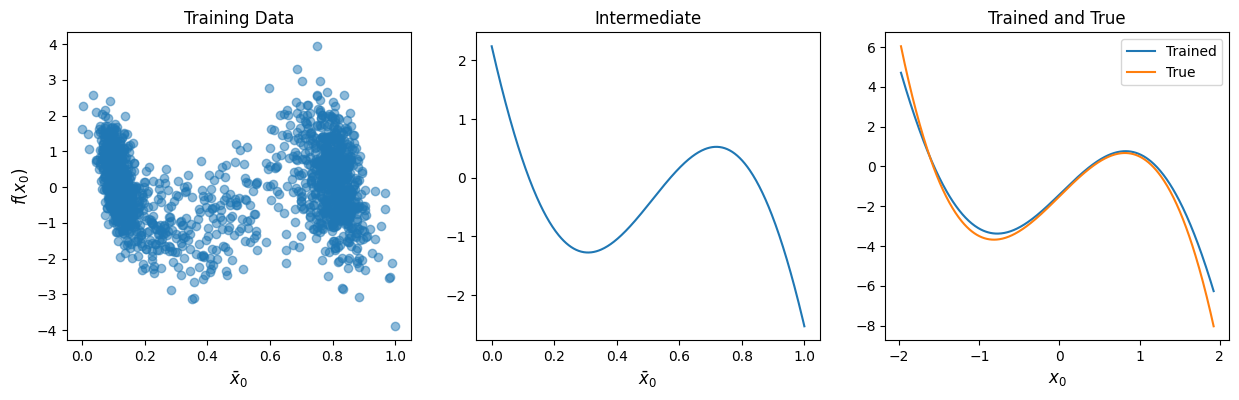

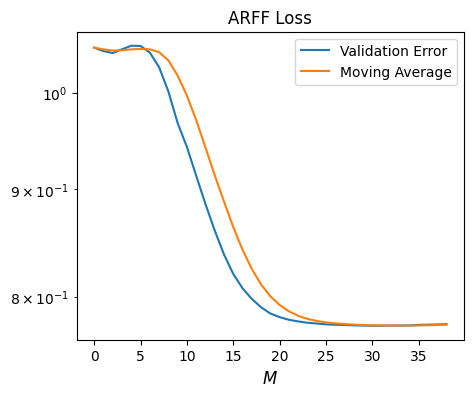

diff epoch: 10
diff completed


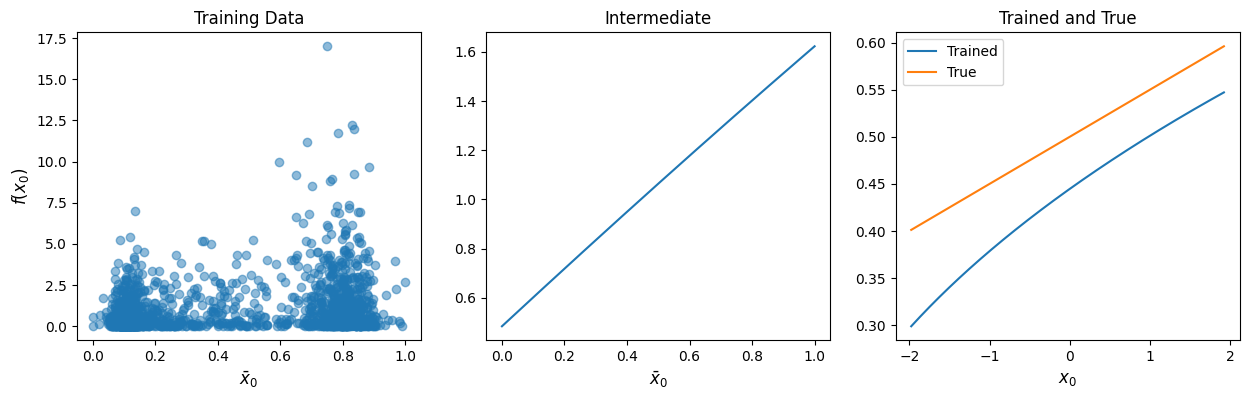

plot completed


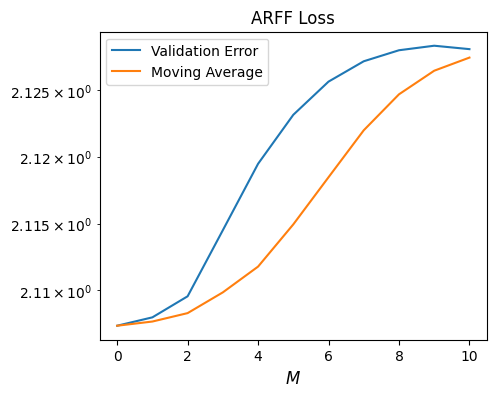

drift_RMSE completed
diff_RMSE completed
loss completed
val_loss completed
true_loss completed
loss completed
Drift RMSE: 0.25093919278268584
Diffusion RMSE: 0.06962173716481997
Observed loss: -0.9622237800957505
Observed validation loss: -0.9277788778090093
True loss: -0.8992313989968258
Training time: 2.893197536468506
step_size: 0.01
# data points: 10000
drift epoch: 42


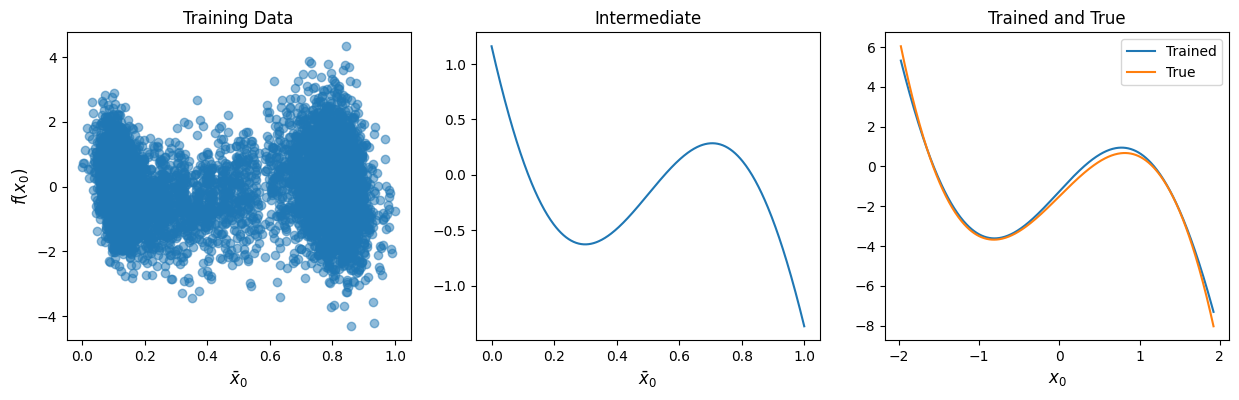

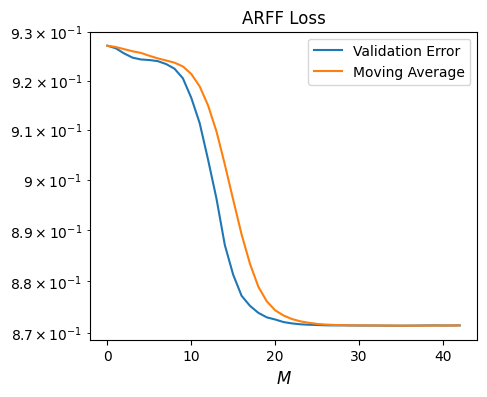

diff epoch: 34
diff completed


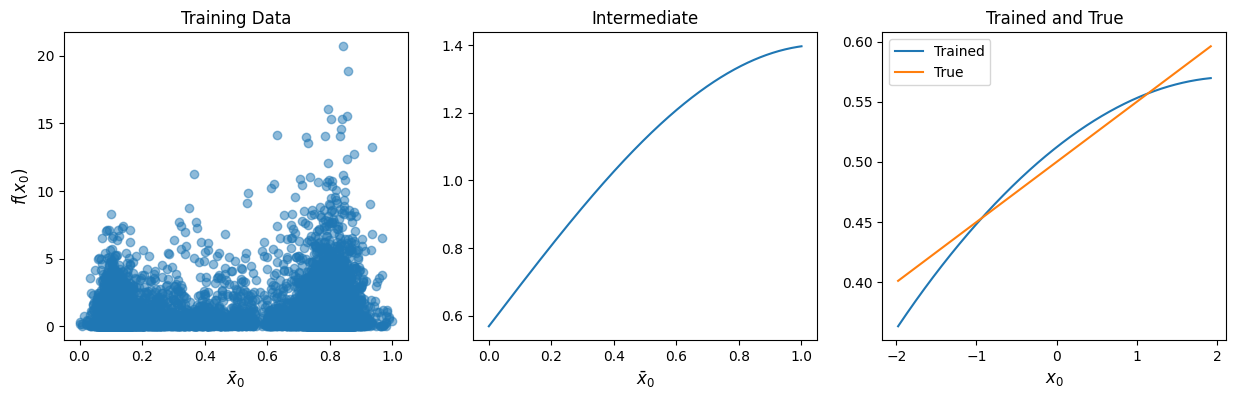

plot completed


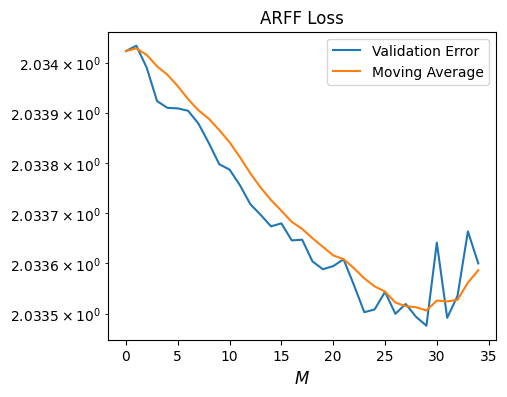

drift_RMSE completed
diff_RMSE completed
loss completed
val_loss completed
true_loss completed
loss completed
Drift RMSE: 0.13184786418780048
Diffusion RMSE: 0.01365758502018236
Observed loss: -1.6361029499779902
Observed validation loss: -1.671190267361821
True loss: -1.6526447707963152
Training time: 23.017213582992554
step_size: 0.005
# data points: 20000
drift epoch: 49


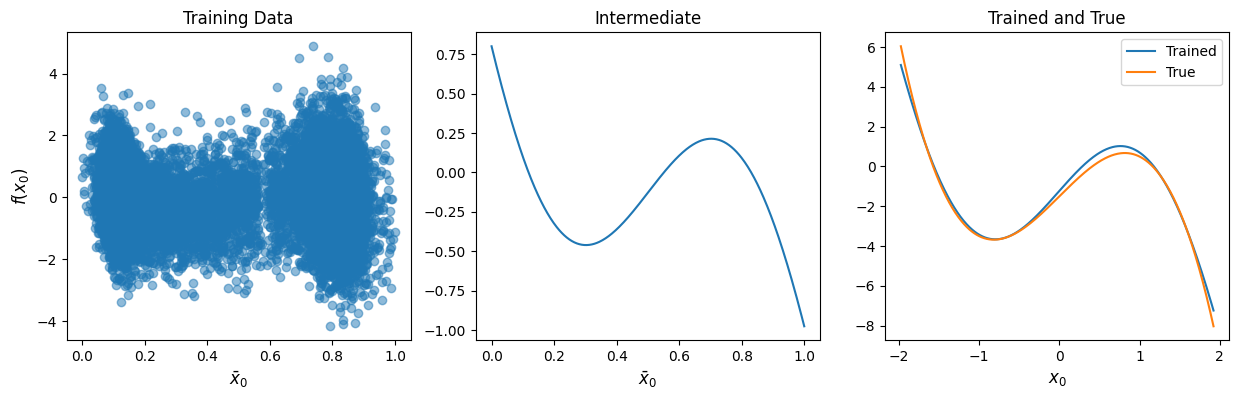

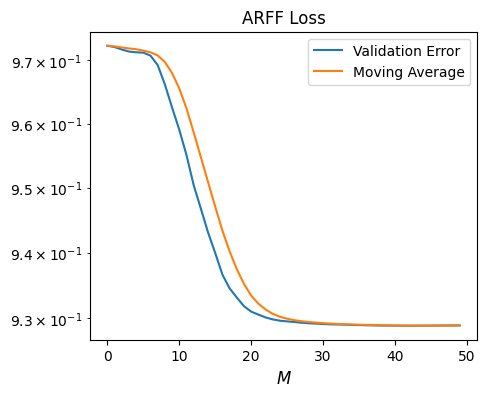

diff epoch: 10
diff completed


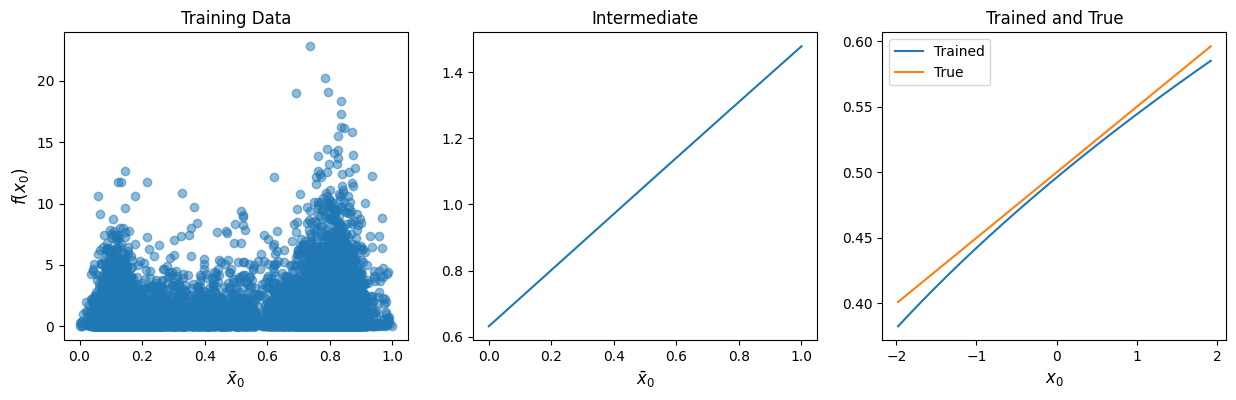

plot completed


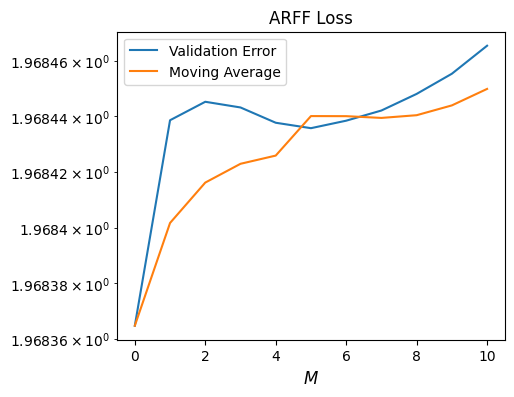

drift_RMSE completed
diff_RMSE completed
loss completed
val_loss completed
true_loss completed
loss completed
Drift RMSE: 0.16188563505301454
Diffusion RMSE: 0.009718442244698521
Observed loss: -1.9805591151519755
Observed validation loss: -1.9715018249672611
True loss: -1.9450259139558994
Training time: 29.537152528762817
step_size: 0.001
# data points: 99900
drift epoch: 33


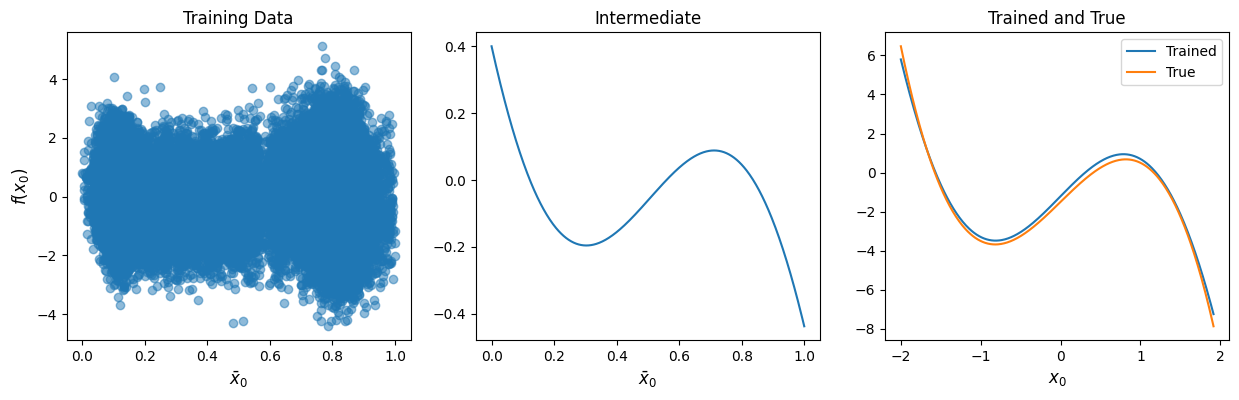

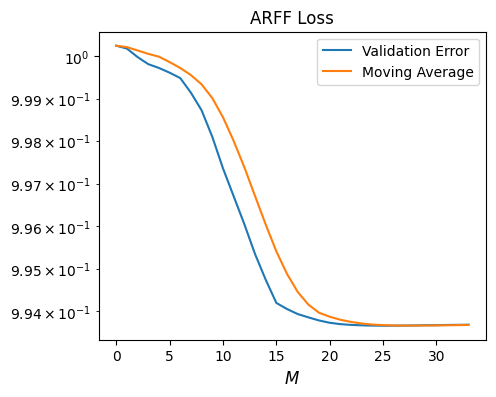

diff epoch: 10
diff completed


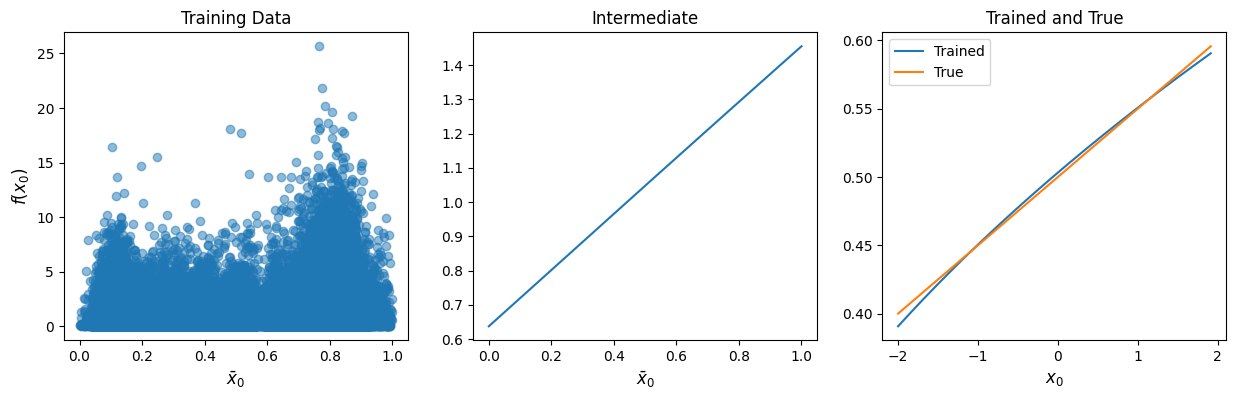

plot completed


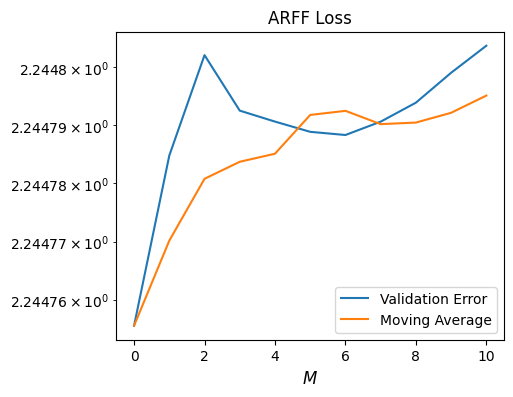

drift_RMSE completed
diff_RMSE completed
loss completed
val_loss completed
true_loss completed
loss completed
Drift RMSE: 0.1664931562625803
Diffusion RMSE: 0.00282466785086464
Observed loss: -2.767195659058954
Observed validation loss: -2.762173040861362
True loss: -2.7451450582715378
Training time: 73.64608025550842
step_size: 0.0005
# data points: 199900
drift epoch: 35


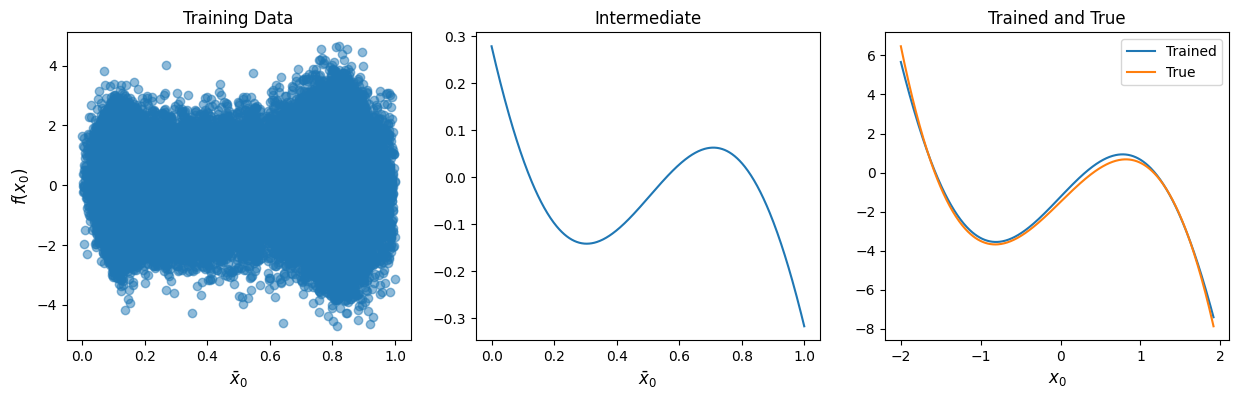

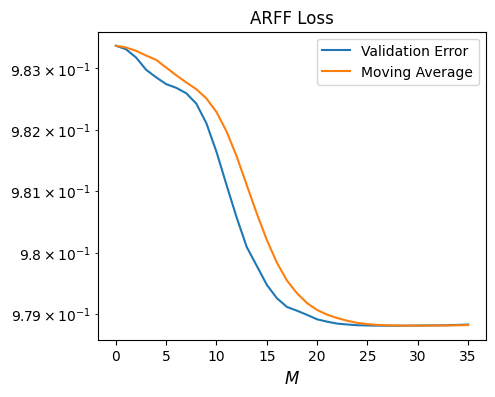

diff epoch: 25
diff completed


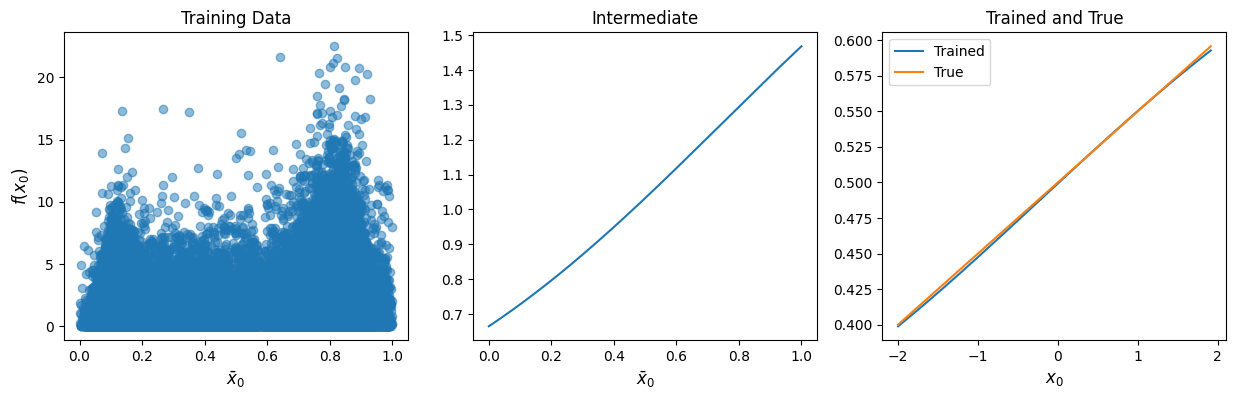

plot completed


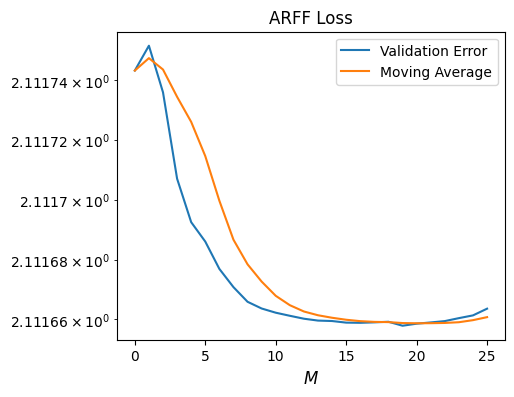

drift_RMSE completed
diff_RMSE completed
loss completed
val_loss completed
true_loss completed
loss completed
Drift RMSE: 0.1372893740195425
Diffusion RMSE: 0.0017612801291792635
Observed loss: -3.11424459947664
Observed validation loss: -3.1197479884958996
True loss: -3.102347376265644
Training time: 258.44620728492737
step_size: 0.0001
# data points: 999900
drift epoch: 58


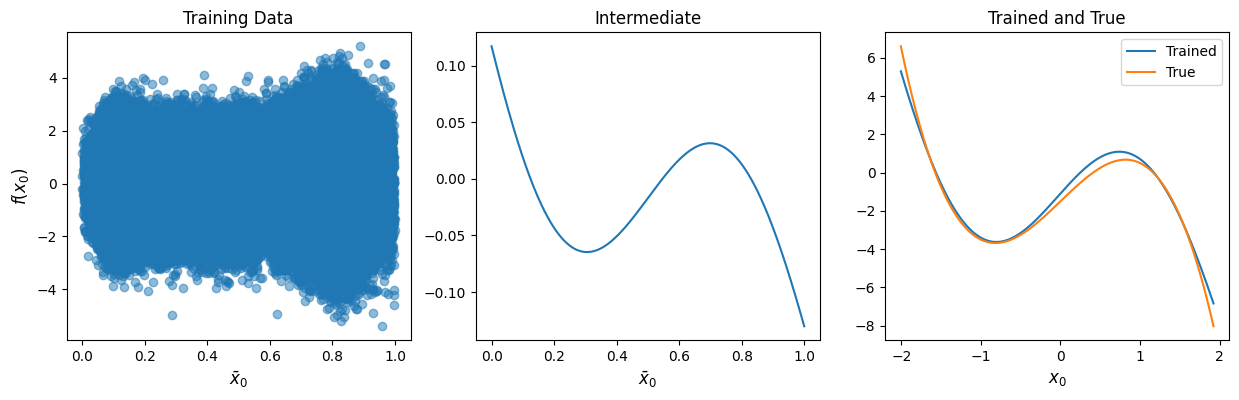

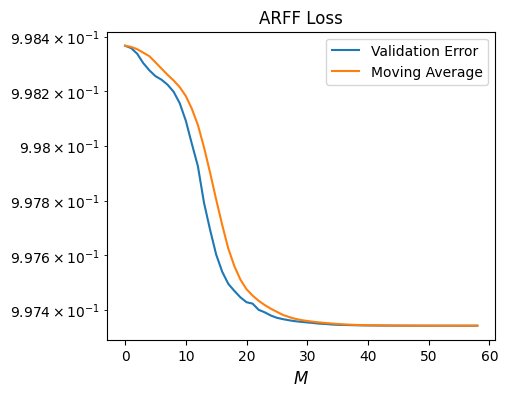

diff epoch: 18
diff completed


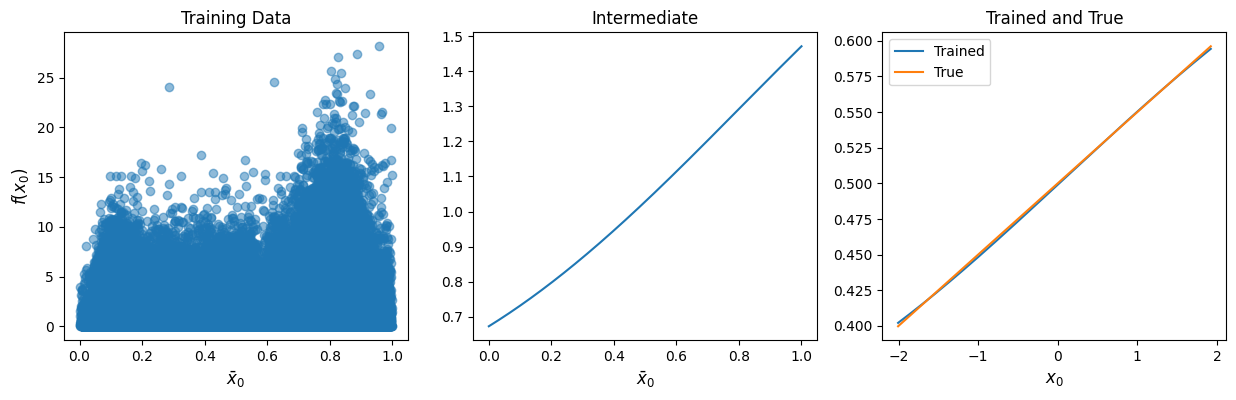

plot completed


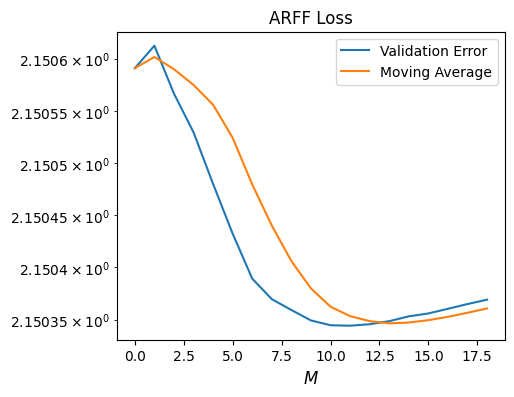

drift_RMSE completed
diff_RMSE completed
loss completed
val_loss completed
true_loss completed
loss completed
Drift RMSE: 0.1894614267305552
Diffusion RMSE: 0.000674016292797398
Observed loss: -3.9166353105121643
Observed validation loss: -3.9186933701199145
True loss: -3.901580103835529
Training time: 1643.1695716381073


In [17]:

# step_size_test = 10 ** np.linspace(-1, -4, 8)
step_size_test = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

drift_RMSE = np.zeros(len(step_size_test))
diffusion_RMSE = np.zeros(len(step_size_test))

for j, step_size in enumerate(step_size_test):
    print('step_size:', step_size)
    rng = np.random.default_rng(random_seed)
    
    sampled_trajectories = trajectories[:, :, ::int(step_size/trajectory_step_size)]
    x_data = sampled_trajectories[:, :, :-1].reshape(-1, n_dimensions)
    y_data = sampled_trajectories[:, :, 1:].reshape(-1, n_dimensions)
    print('# data points:', x_data.shape[0])
    
    step_sizes = np.zeros((x_data.shape[0], 1)) + step_size
    
    # build network
    SAT = SDEARFFTrain(n_dimensions=n_dimensions, rng=rng, resampling=True)
    
    # train network
    hist = SAT.train_model(drift_param, diff_param, true_drift, true_diffusion, x_data, y_data, step_sizes=step_sizes, validation_split=validation_split, ARFF_validation_split=ARFF_validation_split, plot=True)
    drift_RMSE[j] = hist.history["drift_RMSE"]
    diffusion_RMSE[j] = hist.history["diffusion_RMSE"]




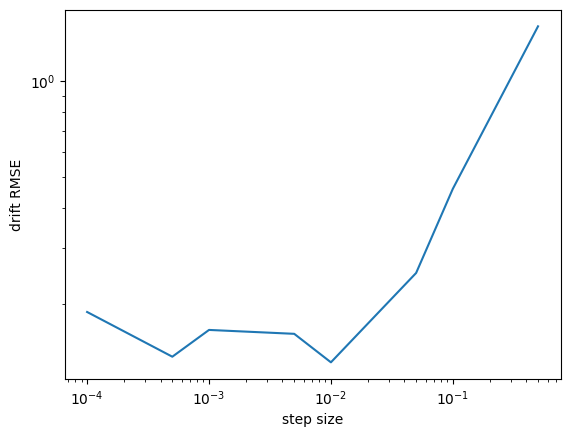

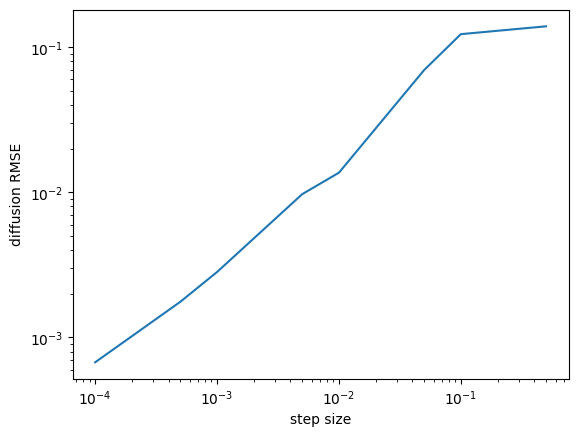

In [18]:
import matplotlib.pyplot as plt

plt.loglog(step_size_test, drift_RMSE)
plt.xlabel('step size')
plt.ylabel('drift RMSE')
plt.show()

plt.loglog(step_size_test, diffusion_RMSE)
plt.xlabel('step size')
plt.ylabel('diffusion RMSE')
plt.show()



In [19]:
# save
output_dir = os.path.join(script_dir, 'saved_results', 'RMSE_v_step_size_v_K_data')
output_file = os.path.join(output_dir, f"{ex_name}_K{drift_param.K}.npz")
np.savez(output_file, step_size=step_size_test, drift_RMSE=drift_RMSE, diffusion_RMSE=diffusion_RMSE)
